In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

vacunados = pd.read_csv("D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_total_vacunas.csv")
vacunados['FECHA_ADMINISTRACION'] = pd.to_datetime(vacunados['FECHA_ADMINISTRACION'], format='%d%b%Y:%H:%M:%S')

type(vacunados)
print(len(vacunados))
pd.set_option("display.max.columns", None)
vacunados.head()

9990


,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR,DOSIS_1,DOSIS_2,ID_CARGA
0,2020-12-31,51 a 60,F,Sputnik,Público,9,0,NaN
1,2020-12-31,51 a 60,M,Sputnik,Público,9,0,NaN
2,2020-12-31,61 a 70,F,Sputnik,Público,1,0,NaN
3,2021-01-02,30 o menos,F,Sputnik,Público,33,0,NaN
4,2021-01-02,30 o menos,M,Sputnik,Público,14,0,NaN


In [2]:
print(min(vacunados["FECHA_ADMINISTRACION"]))
print(max(vacunados["FECHA_ADMINISTRACION"]))

2020-12-29 00:00:00
2021-07-08 00:00:00


In [3]:
groupVacuna = vacunados.groupby('VACUNA')
groupVacuna.describe()

DOSIS_1                                                        \
              count        mean         std  min  25%  50%   75%      max   
VACUNA                                                                      
AstraZeneca  2784.0  221.556394  867.553960  0.0  1.0  8.0  48.0  12350.0   
Sinopharm    1958.0  130.540347  754.476579  0.0  0.0  2.0  27.0  12824.0   
Sputnik      5248.0  138.229040  650.408874  0.0  1.0  9.0  50.0  14144.0   

            DOSIS_2                                                      \
              count       mean         std  min  25%  50%   75%     max   
VACUNA                                                                    
AstraZeneca  2784.0  48.661279  363.523728  0.0  0.0  0.0   4.0  8292.0   
Sinopharm    1958.0  62.481614  409.772183  0.0  0.0  0.0   6.0  8005.0   
Sputnik      5248.0  30.889482  204.260520  0.0  0.0  1.0  15.0  9465.0   

            ID_CARGA                               
               count mean std min 25% 50% 75% max  
VACUNA                                             
AstraZeneca      0.0  NaN NaN NaN NaN NaN NaN NaN  
Sinopharm        0.0  NaN NaN NaN NaN NaN NaN NaN  
Sputnik          0.0  NaN NaN NaN NaN NaN NaN NaN

<AxesSubplot:xlabel='VACUNA'>

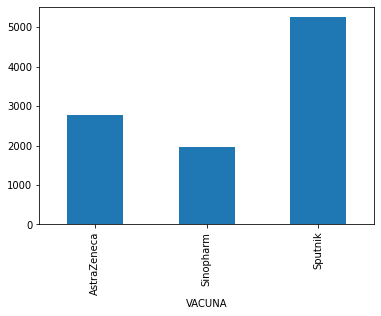

In [4]:
vacunasCount = groupVacuna["FECHA_ADMINISTRACION"].count()
vacunasCount.plot(kind="bar")

In [5]:
vacunasEdadesCount = vacunados.groupby("GRUPO_ETARIO")["FECHA_ADMINISTRACION"].count()
vacunasEdadesCount

GRUPO_ETARIO
30 o menos    1253
31 a 40       1351
41 a 50       1363
51 a 60       1418
61 a 70       1349
71 a 80       1269
81 a 90       1099
91 o mas       888
Name: FECHA_ADMINISTRACION, dtype: int64

<AxesSubplot:xlabel='GRUPO_ETARIO'>

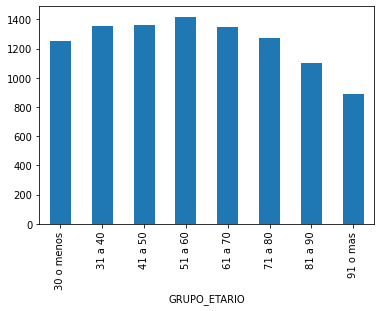

In [6]:
vacunasEdadesCount.plot(kind="bar")

In [7]:
groupGenero = vacunados.groupby('GENERO')
groupGenero.describe()

DOSIS_1                                                       DOSIS_2  \
         count        mean         std  min  25%  50%   75%      max   count   
GENERO                                                                         
F       5149.0  176.560886  752.488700  0.0  1.0  8.0  56.0  11832.0  5149.0   
M       4841.0  142.269159  722.293573  0.0  1.0  6.0  35.0  14144.0  4841.0   

                                                           ID_CARGA           \
             mean         std  min  25%  50%   75%     max    count mean std   
GENERO                                                                         
F       53.892406  364.719768  0.0  0.0  1.0  12.0  9465.0      0.0  NaN NaN   
M       29.421194  218.278607  0.0  0.0  1.0   8.0  6549.0      0.0  NaN NaN   

                            
       min 25% 50% 75% max  
GENERO                      
F      NaN NaN NaN NaN NaN  
M      NaN NaN NaN NaN NaN

Text(0.5, 0, 'Edad')

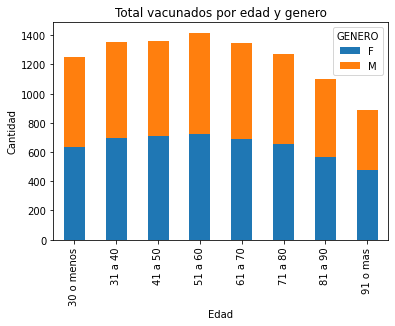

In [8]:
by_edad_sexo = vacunados.groupby(["GRUPO_ETARIO", "GENERO"])
edad_sexo_count = by_edad_sexo["FECHA_ADMINISTRACION"].count()
edadSexo_unstacked = edad_sexo_count.unstack()
s_plot = edadSexo_unstacked.plot(kind='bar', stacked=True, title="Total vacunados por edad y genero")
s_plot.set_ylabel("Cantidad")
s_plot.set_xlabel("Edad")

In [15]:
groupFechaCount = vacunados.groupby(["FECHA_ADMINISTRACION"])["GRUPO_ETARIO"].count().cumsum()
groupFechaCount

FECHA_ADMINISTRACION
2020-12-29      11
2020-12-30      22
2020-12-31      31
2021-01-02      42
2021-01-03      50
              ... 
2021-07-04    9653
2021-07-05    9742
2021-07-06    9832
2021-07-07    9908
2021-07-08    9990
Name: GRUPO_ETARIO, Length: 189, dtype: int64

<AxesSubplot:xlabel='FECHA_ADMINISTRACION'>

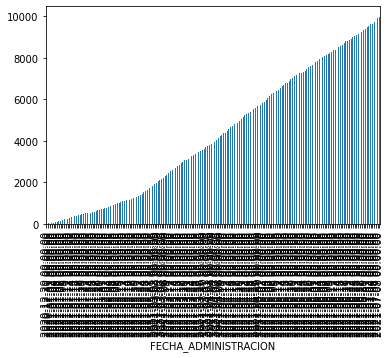

In [16]:
groupFechaCount.plot(kind="bar")